# 第５章


In [34]:
import pandas as pd
%matplotlib inline

In [6]:
ab_test_goal_df = pd.read_csv('./data/DL76333/R/section5-ab_test_goal.csv') # 表示されたバナーの表示回数情報
ab_test_imp_df = pd.read_csv('./data/DL76333/R/section5-ab_test_imp.csv') # 表示されたバナーのクリック階数情報

In [7]:
ab_test_goal_df.head()

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2013-10-01,game-01,sales_test,B,15021,25638
1,2013-10-01,game-01,sales_test,B,351,25704
2,2013-10-01,game-01,sales_test,B,8276,25739
3,2013-10-01,game-01,sales_test,B,1230,25742
4,2013-10-01,game-01,sales_test,B,17471,25743


In [8]:
ab_test_imp_df.head()

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2013-10-01,game-01,sales_test,B,36703,25622
1,2013-10-01,game-01,sales_test,A,44339,25623
2,2013-10-01,game-01,sales_test,B,32087,25624
3,2013-10-01,game-01,sales_test,B,10160,25625
4,2013-10-01,game-01,sales_test,B,46113,25626


In [18]:
len(ab_test_imp_df.index)

87924

In [17]:
 len(ab_test_goal_df)

8598

In [23]:
# 分析するためデータ加工
# バナーの表示回数情報にクリック情報をくっつける
ab_test_merge = pd.merge(ab_test_goal_df, ab_test_imp_df, how='inner', on=['transaction_id'], suffixes=('_goal' , '_imp'))

In [24]:
ab_test_merge.head()

,log_date_goal,app_name_goal,test_name_goal,test_case_goal,user_id_goal,transaction_id,log_date_imp,app_name_imp,test_name_imp,test_case_imp,user_id_imp
0,2013-10-01,game-01,sales_test,B,15021,25638,2013-10-01,game-01,sales_test,B,15021
1,2013-10-01,game-01,sales_test,B,351,25704,2013-10-01,game-01,sales_test,B,351
2,2013-10-01,game-01,sales_test,B,8276,25739,2013-10-01,game-01,sales_test,B,8276
3,2013-10-01,game-01,sales_test,B,1230,25742,2013-10-01,game-01,sales_test,B,1230
4,2013-10-01,game-01,sales_test,B,17471,25743,2013-10-01,game-01,sales_test,B,17471


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


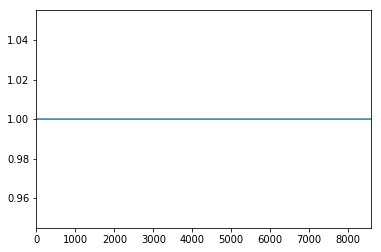

In [35]:
# todo: 列同士の差分の見方がわからん
(ab_test_merge['user_id_goal'] == ab_test_merge['user_id_imp']).plot()

In [36]:
# todo: 同じ列名で、差分がなければ重複とみなし統合？削除?したい
ab_test_merge.rename({'log_date_x': 'log_date_click', 'log_date_y': 'log_date_lmp', 'user_id_x': 'user_id'})

,log_date_goal,app_name_goal,test_name_goal,test_case_goal,user_id_goal,transaction_id,log_date_imp,app_name_imp,test_name_imp,test_case_imp,user_id_imp
0,2013-10-01,game-01,sales_test,B,15021,25638,2013-10-01,game-01,sales_test,B,15021
1,2013-10-01,game-01,sales_test,B,351,25704,2013-10-01,game-01,sales_test,B,351
2,2013-10-01,game-01,sales_test,B,8276,25739,2013-10-01,game-01,sales_test,B,8276
3,2013-10-01,game-01,sales_test,B,1230,25742,2013-10-01,game-01,sales_test,B,1230
4,2013-10-01,game-01,sales_test,B,17471,25743,2013-10-01,game-01,sales_test,B,17471
5,2013-10-01,game-01,sales_test,B,48728,25746,2013-10-01,game-01,sales_test,B,48728
6,2013-10-01,game-01,sales_test,B,16929,25769,2013-10-01,game-01,sales_test,B,16929
7,2013-10-01,game-01,sales_test,B,30111,25780,2013-10-01,game-01,sales_test,B,30111
8,2013-10-01,game-01,sales_test,B,30328,25791,2013-10-01,game-01,sales_test,B,30328
9,2013-10-01,game-01,sales_test,B,32453,25796,2013-10-01,game-01,sales_test,B,32453
